In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import os
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
print (Bankdata.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [42]:
term_deposits = Bankdata.copy()


In [43]:
Bankdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [44]:
Bankdata.isnull()
Bankdata.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [45]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

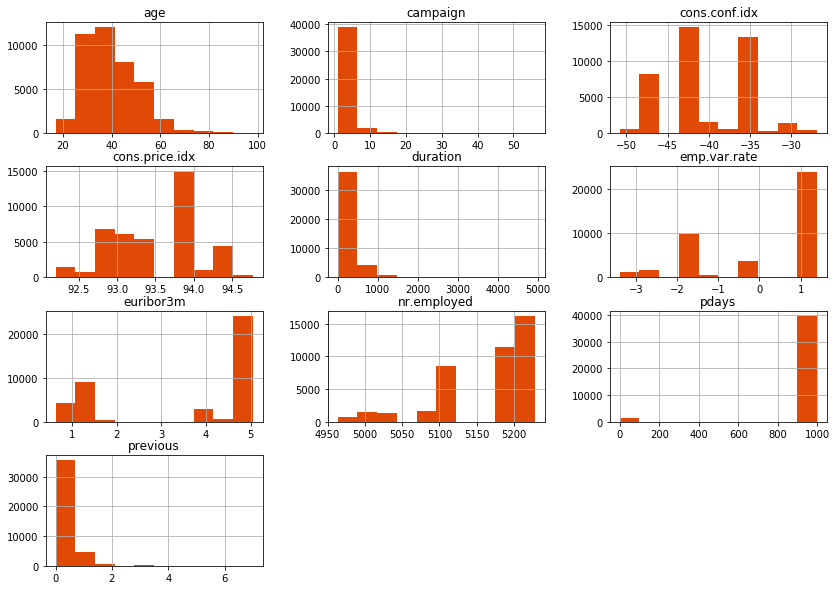

In [46]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt

Bankdata.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

In [47]:
# Convert the columns that contain a Yes or No. (Binary Columns)
def convert_to_int(Bankdata, new_column, target_column):
    Bankdata[new_column] = Bankdata[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return Bankdata[new_column].value_counts()

In [48]:
convert_to_int(Bankdata, "y_int", "y") #Create a y int
convert_to_int(Bankdata, "housing_int", "housing") # Create housingint column
convert_to_int(Bankdata, "loan_int", "loan") #Create a loan_int column
convert_to_int(Bankdata, "default_int", "default") #Create a default_int column

0    32588
1     8600
Name: default_int, dtype: int64

In [49]:
# Drop the non-binary columns and leave the same column in the form of integers 0 = No and 1 = Yes
Bankdata.drop(['housing', 'loan', 'default','y'], axis=1, inplace=True)

In [50]:
Bankdata.rename(columns={'y_int':'term_deposit'}, inplace=True)

In [51]:
print(Bankdata.head())

   age        job  marital    education    contact month day_of_week  \
0   56  housemaid  married     basic.4y  telephone   may         mon   
1   57   services  married  high.school  telephone   may         mon   
2   37   services  married  high.school  telephone   may         mon   
3   40     admin.  married     basic.6y  telephone   may         mon   
4   56   services  married  high.school  telephone   may         mon   

   duration  campaign  pdays     ...          poutcome emp.var.rate  \
0       261         1    999     ...       nonexistent          1.1   
1       149         1    999     ...       nonexistent          1.1   
2       226         1    999     ...       nonexistent          1.1   
3       151         1    999     ...       nonexistent          1.1   
4       307         1    999     ...       nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  term_deposit  \
0          93.994          -36.4      4.857       5191.0          

In [52]:
dep = Bankdata['term_deposit']
Bankdata.drop(labels=['term_deposit'], axis=1,inplace = True)
Bankdata.insert(0, 'term_deposit', dep)

In [53]:
# Convert duration to minutes of conversation.
decimal_points = 2
Bankdata['duration'] = Bankdata['duration'] / 60
Bankdata['duration'] = Bankdata['duration'].apply(lambda x: round(x, decimal_points))
Bankdata.head()

,term_deposit,age,job,marital,education,contact,month,day_of_week,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_int,loan_int,default_int
0,0,56,housemaid,married,basic.4y,telephone,may,mon,4.35,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0
1,0,57,services,married,high.school,telephone,may,mon,2.48,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1
2,0,37,services,married,high.school,telephone,may,mon,3.77,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,0,0
3,0,40,admin.,married,basic.6y,telephone,may,mon,2.52,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0
4,0,56,services,married,high.school,telephone,may,mon,5.12,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0


In [54]:
Bankdata = pd.get_dummies(Bankdata, columns=['job'])


In [55]:
Bankdata.head()

,term_deposit,age,marital,education,contact,month,day_of_week,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,56,married,basic.4y,telephone,may,mon,4.35,1,999,...,0,1,0,0,0,0,0,0,0,0
1,0,57,married,high.school,telephone,may,mon,2.48,1,999,...,0,0,0,0,0,1,0,0,0,0
2,0,37,married,high.school,telephone,may,mon,3.77,1,999,...,0,0,0,0,0,1,0,0,0,0
3,0,40,married,basic.6y,telephone,may,mon,2.52,1,999,...,0,0,0,0,0,0,0,0,0,0
4,0,56,married,high.school,telephone,may,mon,5.12,1,999,...,0,0,0,0,0,1,0,0,0,0


In [56]:
Bankdata = pd.get_dummies(Bankdata, columns=['education'])
Bankdata.head()

,term_deposit,age,marital,contact,month,day_of_week,duration,campaign,pdays,previous,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,0,56,married,telephone,may,mon,4.35,1,999,0,...,0,0,1,0,0,0,0,0,0,0
1,0,57,married,telephone,may,mon,2.48,1,999,0,...,0,0,0,0,0,1,0,0,0,0
2,0,37,married,telephone,may,mon,3.77,1,999,0,...,0,0,0,0,0,1,0,0,0,0
3,0,40,married,telephone,may,mon,2.52,1,999,0,...,0,0,0,1,0,0,0,0,0,0
4,0,56,married,telephone,may,mon,5.12,1,999,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
Bankdata = pd.get_dummies(Bankdata, columns=['marital','contact','poutcome','month','day_of_week'])
Bankdata.head()

,term_deposit,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,56,4.35,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
1,0,57,2.48,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
2,0,37,3.77,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
3,0,40,2.52,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
4,0,56,5.12,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0


In [58]:
Bankdata.head()

,term_deposit,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,56,4.35,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
1,0,57,2.48,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
2,0,37,3.77,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
3,0,40,2.52,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0
4,0,56,5.12,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,0,0


In [59]:
from sklearn.model_selection import train_test_split


In [60]:
#Xs = onpData.drop(onpData.columns[-1], axis = 1)
Xs = Bankdata.drop('term_deposit', axis = 1)

In [61]:
#y = onpData.drop(onpData.columns[:-1], axis = 1)
y = Bankdata['term_deposit']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: term_deposit, dtype: int64

In [62]:
Xs.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,4.35,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
1,57,2.48,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
2,37,3.77,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
3,40,2.52,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
4,56,5.12,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0


In [63]:
xTrain, xVald, yTrain, yVald = train_test_split(Xs, y, train_size=0.60, random_state = 2)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [64]:
#standardize the input variables between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
scaler.fit(xTrain)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
xTrain = scaler.transform(xTrain)
xVald = scaler.transform(xVald)

In [68]:
#K-NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xTrain, yTrain)
print (accuracy_score(yTrain, knn.predict(xTrain)))
print (accuracy_score(yVald, knn.predict(xVald)))

0.927322758174
0.890082544307


In [72]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTrain, yTrain)
print (accuracy_score(yTrain, knn.predict(xTrain)))
print (accuracy_score(yVald, knn.predict(xVald)))

0.929265134348
0.888079630978


In [73]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xTrain, yTrain)
print (accuracy_score(yTrain, knn.predict(xTrain)))
print (accuracy_score(yVald, knn.predict(xVald)))

0.913442861768
0.891842680262


In [37]:
n_range = np.arange(1, 21)
n_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [38]:
n_score = pd.DataFrame(columns=['NumNeig', 'TrainScore', 'ValdScore'])
n_score

,NumNeig,TrainScore,ValdScore


In [ ]:
for i in n_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    accTrain = accuracy_score(yTrain, knn.predict(xTrain))
    accVald = accuracy_score(yVald, knn.predict(xVald))
    n_score = n_score.append({'NumNeig': i, 'TrainScore':accTrain, 'ValdScore':accVald}, ignore_index=True)

n_score.head()

In [ ]:
bestValdScore = n_score['ValdScore'].max()
bestValdScore

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(n_score['NumNeig'], n_score['TrainScore'], label = 'Training')
plt.plot(n_score['NumNeig'], n_score['ValdScore'], label = 'Validation', c='red')
plt.axhline(bestValdScore, c='black', linestyle = ':')
plt.title('Accuracy Score for Training and Validation Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors Used')
plt.legend()
plt.show()

In [74]:
##Classification Tree
from sklearn.tree import DecisionTreeClassifier

In [75]:
decTree = DecisionTreeClassifier(max_leaf_nodes=19)

In [76]:
decTree.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=19,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
import graphviz
from sklearn import tree

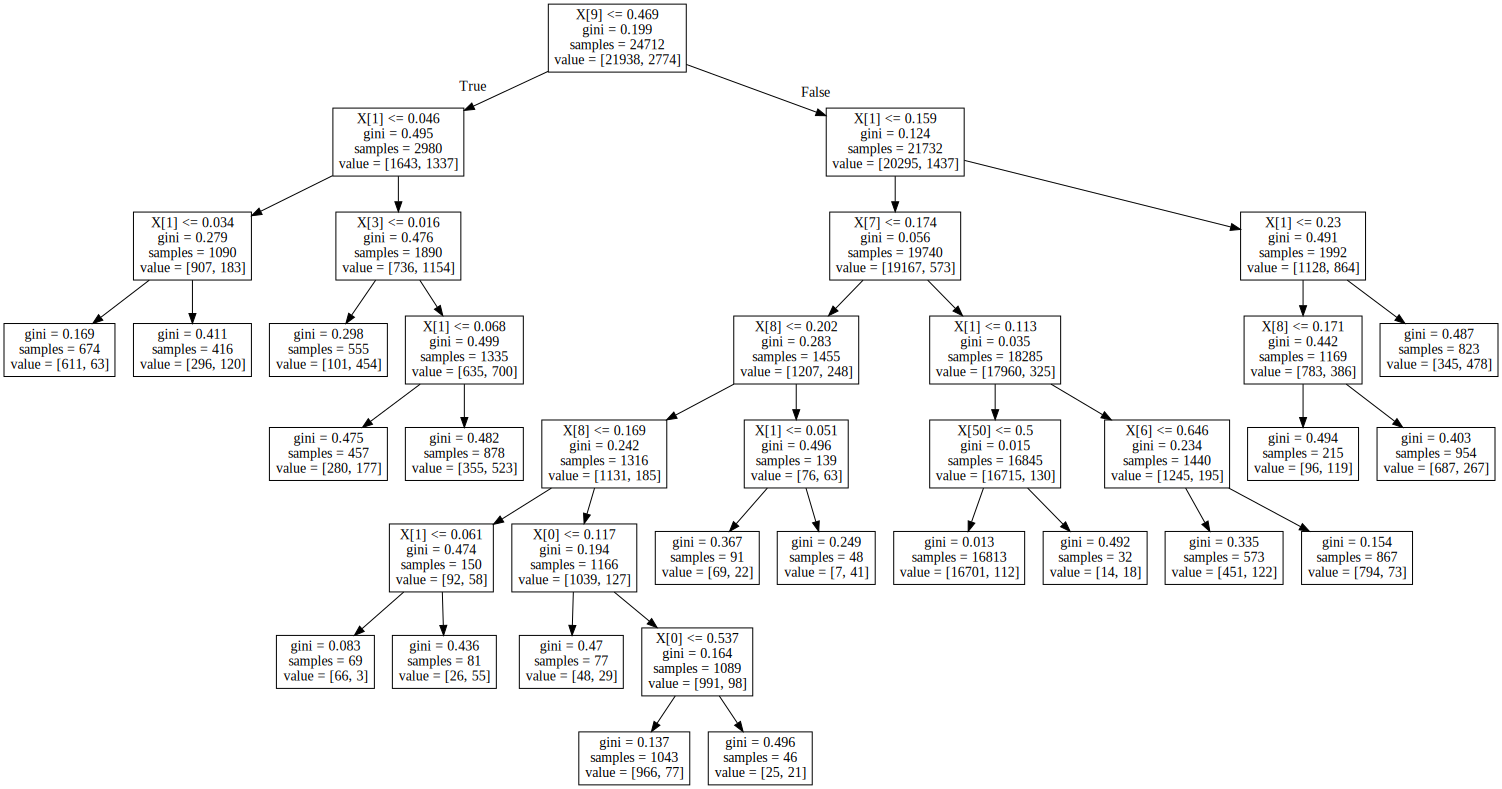

In [78]:
dot_data = tree.export_graphviz(decTree, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(yVald, decTree.predict(xVald))

0.91490653071133765

In [81]:
leaf_range=np.arange(2,40)
leaf_range

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])

In [82]:
leaf_score = pd.DataFrame(columns=['NofLeaves', 'TrainScore', 'ValidationScore'])
leaf_score

,NofLeaves,TrainScore,ValidationScore


In [83]:
for i in leaf_range:
    decTree= DecisionTreeClassifier(max_leaf_nodes=i)
    decTree.fit(xTrain, yTrain)
    accTrain = accuracy_score(yTrain, decTree.predict(xTrain))
    accVald= accuracy_score(yVald, decTree.predict(xVald))
    leaf_score = leaf_score.append({'NofLeaves': i, 'TrainScore': accTrain, 'ValidationScore':accVald}, ignore_index=True)

leaf_score.head()

,NofLeaves,TrainScore,ValidationScore
0,2.0,0.887747,0.886744
1,3.0,0.887747,0.886744
2,4.0,0.904662,0.902343
3,5.0,0.904662,0.902343
4,6.0,0.904662,0.902343


In [172]:
leaf_score

,NofLeaves,TrainScore,ValidationScore
0,2.0,0.887747,0.886744
1,3.0,0.887747,0.886744
2,4.0,0.904662,0.902343
3,5.0,0.904662,0.902343
4,6.0,0.904662,0.902343
5,7.0,0.910044,0.907198
6,8.0,0.910044,0.907198
7,9.0,0.910974,0.907987
8,10.0,0.915142,0.912115
9,11.0,0.915142,0.912115


In [84]:
bestValdScore = leaf_score['ValidationScore'].max()

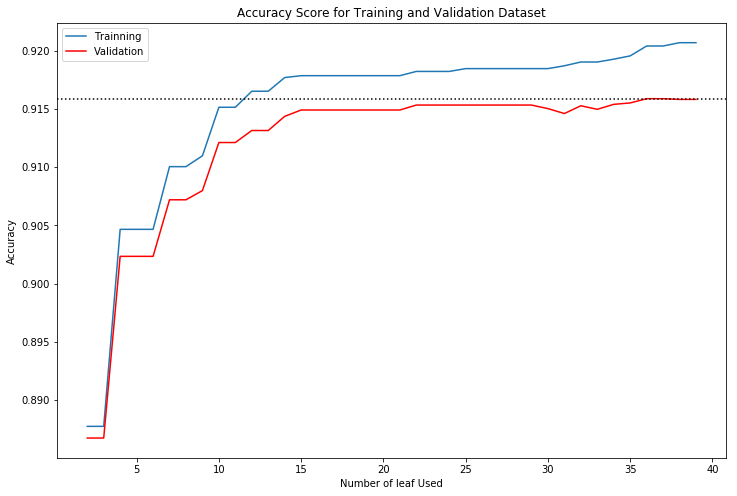

In [85]:
plt.figure(figsize=(12,8))
plt.plot(leaf_score['NofLeaves'], leaf_score['TrainScore'], label='Trainning')
plt.plot(leaf_score['NofLeaves'], leaf_score['ValidationScore'], label='Validation', color='red')
plt.title('Accuracy Score for Training and Validation Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Number of leaf Used')
plt.axhline(bestValdScore, color = 'black', linestyle=':')
plt.legend()
plt.show()

In [86]:
##Neural Networks
from sklearn.metrics import accuracy_score

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
nn = MLPClassifier(hidden_layer_sizes=(50,50,50,), activation='relu', max_iter=200, solver='lbfgs')

In [89]:
nn.fit(xTrain, yTrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [90]:
print(accuracy_score (yVald, nn.predict(xVald)))
print(accuracy_score (yTrain, nn.predict(xTrain)))
nn.score(xTrain, yTrain)

0.909019179412
0.921900291356


0.92190029135642604

In [91]:
nn.predict(xTrain).sum()

2508

In [44]:
print(Bankdata['month'].value_counts())
cross_month = pd.crosstab(Bankdata['month'], Bankdata['term_deposit']).apply(lambda x: x/x.sum() * 100)
cross_month

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


term_deposit,0,1
month,,
apr,5.726716,11.616379
aug,15.111634,14.116379
dec,0.254460,1.918103
jul,17.853234,13.987069
jun,13.021232,12.047414
mar,0.738755,5.948276
may,35.249535,19.094828
nov,10.082631,8.965517
oct,1.102660,6.788793


In [45]:
# Let's create a date column that will be interesting.
# We will assume the year is 2017
Bankdata['year'] = 2017
lst = [Bankdata]

# Create a column with the numeric values of the months.
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

# Change datatype from int32 to int64
Bankdata["month_int"] = Bankdata["month_int"].astype(np.int64)

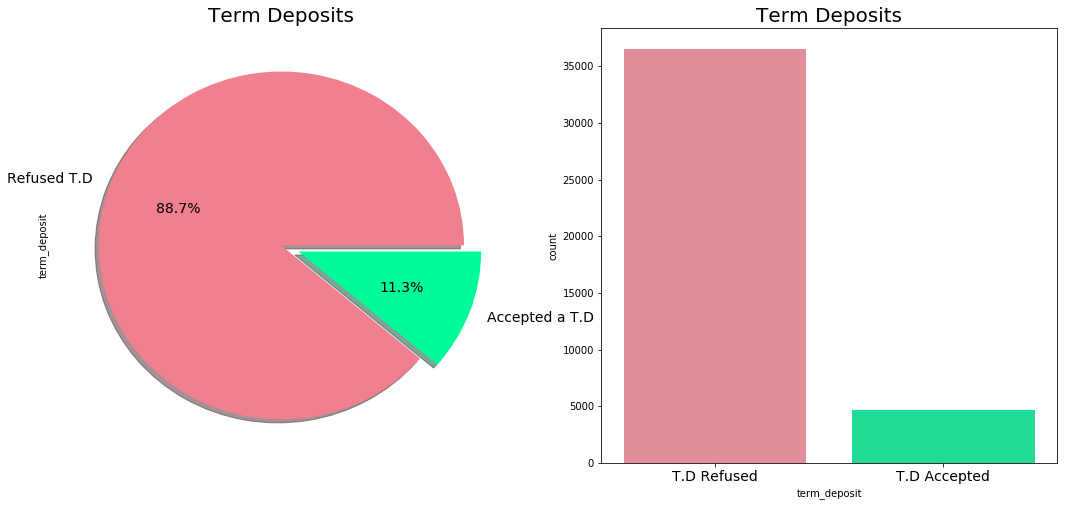

In [69]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#F08090", "#00FA9A"]
labels = 'Refused T.D', 'Accepted a T.D'
Bankdata['term_deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
sns.countplot('term_deposit',data=Bankdata,ax=ax[1], palette=colors)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['T.D Refused', 'T.D Accepted'], fontsize=14)
plt.show()

In [76]:
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(Bankdata.loc[(Bankdata['term_deposit'] == 0),'month_int'] , color='#F08080',shade=True,label='Refused T.D')
ax=sns.kdeplot(Bankdata.loc[(Bankdata['term_deposit'] == 1),'month_int'] , color='#00FA9A',shade=True, label='Accepted T.D')
ax.set(xlabel='Months', ylabel='Frequency')
plt.title('Term Deposits by Month')

Text(0.5,1,'Term Deposits by Month')

In [66]:
# Create the Season column.
Bankdata['season'] = np.nan
lst=[Bankdata]
# The conditions for determining each of the seasons.
for column in lst:
    column.loc[(column["month_int"] >= 3) & (column["month_int"] <= 5), 'season'] = 'spring'
    column.loc[(column["month_int"] >= 6) & (column["month_int"] <= 8), 'season'] = 'summer'
    column.loc[(column["month_int"] >= 9) & (column["month_int"] <= 11), 'season'] = 'fall'
    column.loc[column["month_int"] <= 2, 'season'] = 'winter'
    column.loc[column["month_int"] == 12, 'season'] = 'winter'
    
Bankdata['season'].value_counts()

summer    18670
spring    16947
fall       5389
winter      182
Name: season, dtype: int64

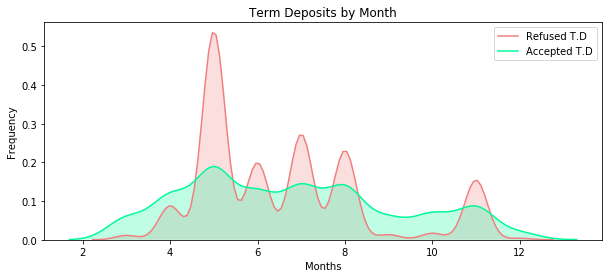

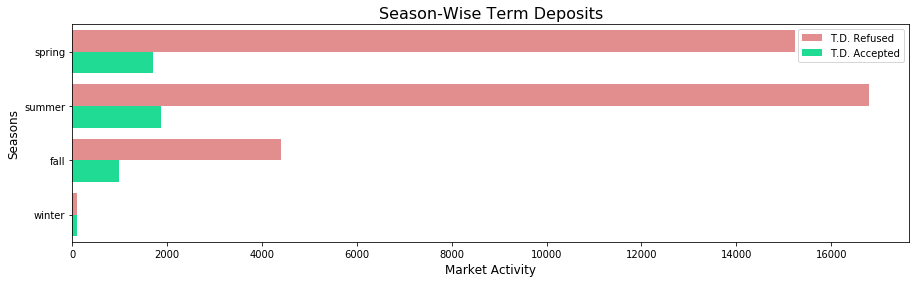

In [77]:
fig = plt.figure(figsize=(15,4),)

colors = ['#F08080', '#00FA9A']

ax = sns.countplot(y='season', data=Bankdata,
           hue='term_deposit',
           palette = colors
          ) 

plt.title("Season-Wise Term Deposits", fontsize=16)
plt.ylabel("Seasons", fontsize=12)
plt.xlabel("Market Activity", fontsize=12)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('T.D. Refused')
legend_name.get_texts()[1].set_text('T.D. Accepted')

plt.show()

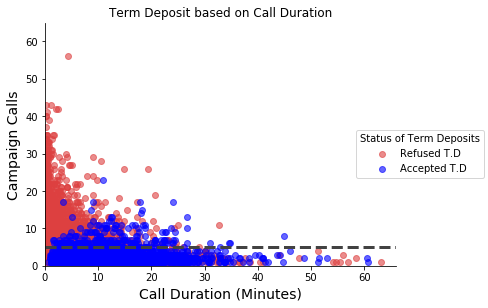

In [113]:
colors = ['#DD4040', '#0000ff', '#bf40bf', '#9B00AA']


g = sns.lmplot(x='duration', y='campaign', data=Bankdata,
           fit_reg=False, # No regression line
           hue='term_deposit',
        palette = colors,
        scatter_kws={'alpha':0.6}
          ) 

g.fig.set_size_inches(7,4)
# title
new_title = 'Status of Term Deposits'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Refused T.D ', 'Accepted T.D']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.axis([0,66,0,65])
plt.axhline(y=5, linewidth=3, color="#424242", linestyle='--')
plt.xlabel('Call Duration (Minutes)', fontsize=14)
plt.ylabel('Campaign Calls', fontsize=14)
plt.title("Term Deposit based on Call Duration")
plt.show()

In [108]:
##Analysis of Term Deposit based on Age 
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(Bankdata.loc[(Bankdata['term_deposit'] == 0),'age'] , color='#bf40bf',shade=True,label='T.D. Refused')
ax=sns.kdeplot(Bankdata.loc[(Bankdata['term_deposit'] == 1),'age'] , color='#00FA9A',shade=True, label='T.D. Accepted')
ax.set(xlabel='Age of Individuals', ylabel='Frequency')
plt.title('Term Subscriptions by Age')

Text(0.5,1,'Term Subscriptions by Age')

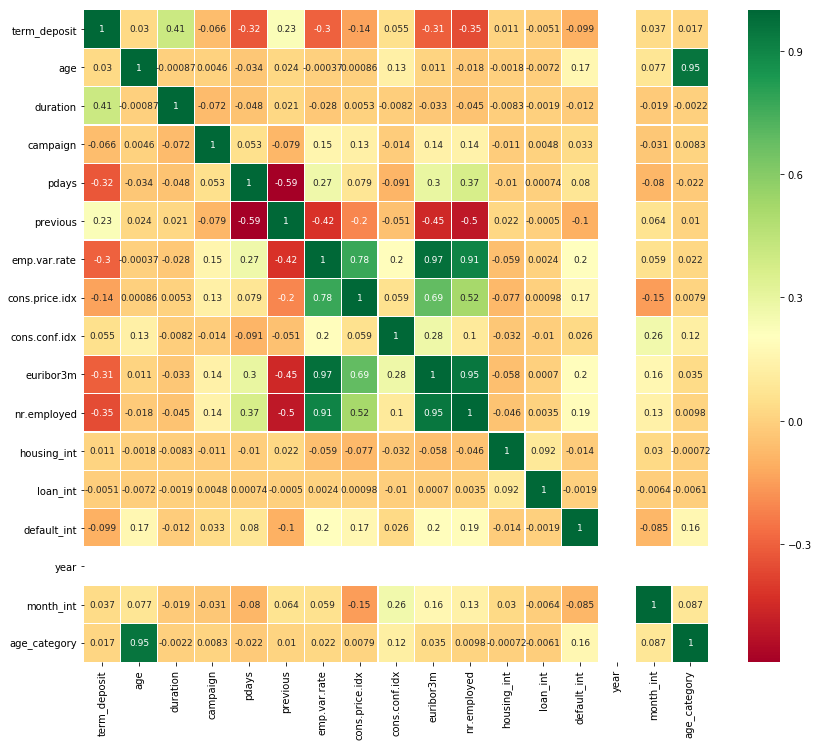

In [120]:
corr = Bankdata.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':9})
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [92]:
knn_output= knn.predict(xTrain)

In [93]:
decTree_output=decTree.predict(xTrain)

In [94]:
# Creating dataframe for NN, KNN, and DecTree
nn_output=pd.DataFrame(nn.predict(xTrain))

In [95]:
knn_output=pd.DataFrame(knn_output)


In [96]:
decTree_output=pd.DataFrame(decTree_output)


In [97]:
ensemble_Train=pd.concat([nn_output,decTree_output,knn_output],axis=1)

In [98]:
col1=(['nn_output','decTree_output','knn_output'])
ensemble_Train.columns=col1
ensemble_Train.head()

,nn_output,decTree_output,knn_output
0,1,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,0,0,0


In [99]:
nn_ensemble= MLPClassifier(hidden_layer_sizes=(50,50,50,), activation='relu', max_iter=200, solver='lbfgs')
nn_ensemble.fit(ensemble_Train, yTrain)
print("Accuracy Score: ",accuracy_score(yTrain,nn_ensemble.predict(ensemble_Train)))

Accuracy Score:  0.926553900939
